In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
from Poisson_Cyl import Poisson_Cyl as p_solver
from Poisson_Cyl import Sphere as sph

In [4]:
NN = 16

rho = 10.0                    ## density inside sphere
R0  = 3.5                     ## radius of sphere

r0, theta0 = 4.5, np.pi
x0, y0, z0 = r0*np.sin(theta0), r0*np.cos(theta0), 4.0   ## center of the sphere

In [5]:
# Start simulation domain
run1 = p_solver(NN, method="convolution")

# get coordinate
crt_x1, crt_x2, crt_x3 = run1.get_crt_coord()

In [6]:
# Prepare for the density distribution
spheres = sph(rho, R0, x0, y0, z0, crt_x1, crt_x2, crt_x3)

In [7]:
# Init density distributin
run1.init_problem(spheres)

In [8]:
convl_potential = run1.solve()

In [9]:
convl_analytic  = run1.analytic_sol()
convl_error     = run1.error()
convl_error_rel = convl_error/convl_analytic
convl_L1        = run1.L1_error()
print(convl_L1)

0.00535908151438


## Plot Rho

In [30]:
rho_array = spheres.get_rho()

Text(0.5,0.98,'N = 64')

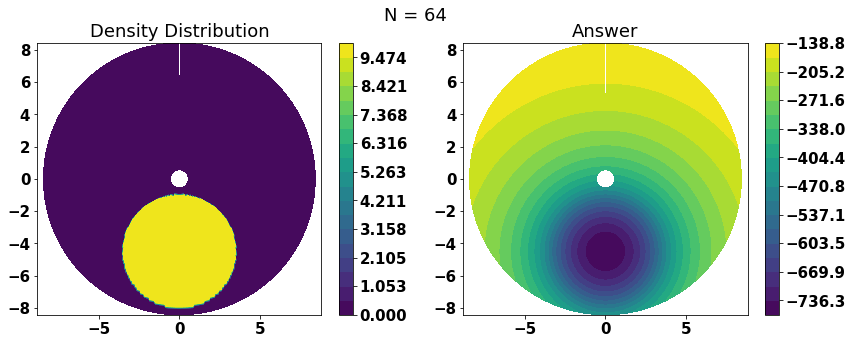

In [31]:
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(14, 5))

plan = int(NN/2)

plt.subplot(121)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], rho_array[:,:,plan], 
             levels=np.linspace(np.min(rho_array[:,:,plan]), np.max(rho_array[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Density Distribution")
plt.colorbar()

plt.subplot(122)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_analytic[:,:,plan], 
             levels=np.linspace(np.min(convl_analytic[:,:,plan]), np.max(convl_analytic[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN))

In [32]:
convl_resolution = [16, 32, 64]
convl_L1_list = [0.00535908151438, 0.000618393746327, 0.000150383427355]

In [33]:
gamer_resolution = [16, 32, 64, 128]
gamer_L1_s = [0.005359157575, 0.000618461524, 0.000150450468, 0.000056523836]

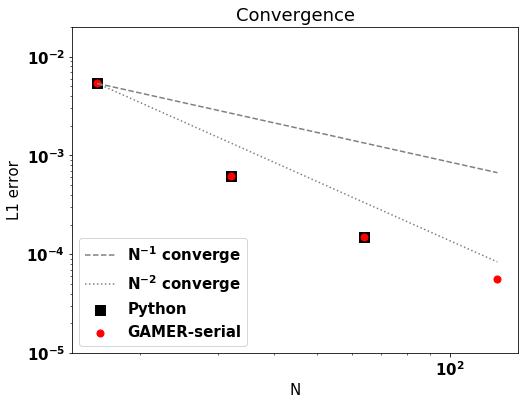

In [37]:
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(8, 6))


plt.scatter(convl_resolution, convl_L1_list, color='k', marker="s", s=100, label="Python")
plt.scatter(gamer_resolution, gamer_L1_s,    color='r', marker="o", s=50, label="GAMER-serial")

#plt.plot([convl_resolution[0], convl_resolution[-1]],
#         [convl_L1_list[0], convl_L1_list[0]*(convl_resolution[-1]/convl_resolution[0])**(-1.0)], 
#         linestyle="--", color="k", label=r"N$^{-1}$ converge")

#plt.plot([convl_resolution[0], convl_resolution[-1]],
#         [convl_L1_list[0], convl_L1_list[0]*(convl_resolution[-1]/convl_resolution[0])**(-2.0)], 
#         linestyle=":", color="k", label=r"N$^{-2}$ converge")

plt.plot([gamer_resolution[0], gamer_resolution[-1]],
         [gamer_L1_s[0], gamer_L1_s[0]*(gamer_resolution[-1]/gamer_resolution[0])**(-1.0)], 
         linestyle="--", color="gray", label=r"N$^{-1}$ converge")

plt.plot([gamer_resolution[0], gamer_resolution[-1]],
         [gamer_L1_s[0], gamer_L1_s[0]*(gamer_resolution[-1]/gamer_resolution[0])**(-2.0)], 
         linestyle=":", color="gray", label=r"N$^{-2}$ converge")


plt.xscale("log")
plt.yscale("log")

plt.ylim(1e-5, 2e-2)

plt.title("Convergence")

plt.xlabel("N")
plt.ylabel("L1 error")

plt.legend(loc="best", fontsize=15)

Text(0.5,0.98,'N = 32, L1 = 0.000618393746327')

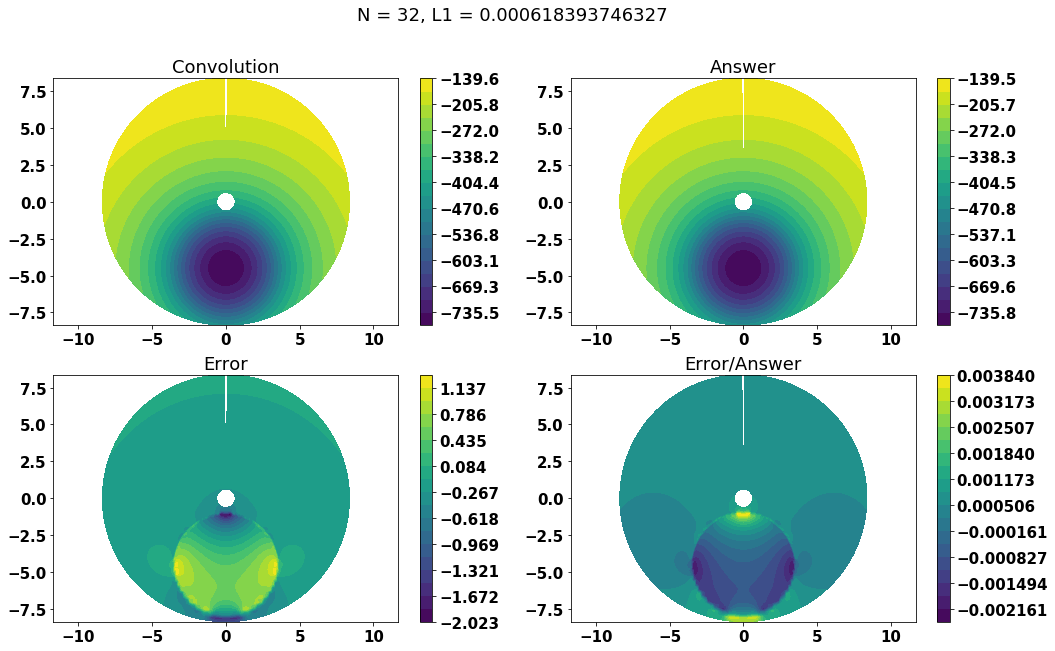

In [23]:
## Compare Phi solution
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(17, 10))

plan = int(NN/2)

plt.subplot(221)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_potential[:,:,plan], 
             levels=np.linspace(np.min(convl_potential[:,:,plan]), np.max(convl_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Convolution")
plt.colorbar()

plt.subplot(222)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_analytic[:,:,plan], 
             levels=np.linspace(np.min(convl_analytic[:,:,plan]), np.max(convl_analytic[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Answer")
plt.colorbar()


plt.subplot(223)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error[:,:,plan], 
             levels=np.linspace(np.min(convl_error[:,:,plan]), np.max(convl_error[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title("Error")
plt.colorbar()

plt.subplot(224)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error_rel[:,:,plan], 
             levels=np.linspace(np.min(convl_error_rel[:,:,plan]), np.max(convl_error_rel[:,:,plan]), 20), 
             cmap="viridis")

plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN) + ", L1 = " + str(convl_L1))